In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from IPython.display import display
from scipy.stats import normaltest

import scipy.stats as stats

os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2-diamonds.csv',
 'diamonds.ipynb',
 'diamonds_etienne.ipynb']

In [3]:
diamonds = pd.read_csv("2-diamonds.csv")

diamonds.shape

(53940, 10)

# Première partie

On a en notre dispostion un jeu de données sur des diamants pour lesquels nous avons 53490 individus et pour lesquels nous connaissons 10 variables

In [4]:
display(diamonds.describe().T)

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [121]:
def descQuanti(variable):
    """
        Oui bonjour
    """

    #Statistique classique
    print("Information sur la variable %s : " % variable)
    describe = diamonds[variable].describe()
    df = pd.DataFrame(describe)
    display(df.T)

    # Figure 1 : Histogramme
    plt.figure(figsize=(12,8))

    # Histogramme en bar
    diamonds[variable].plot(kind = "hist", density = True, color = "lightgrey", bins=100)
    # Densité
    diamonds[variable].plot(kind = "kde")
    
    plt.title("Histogramme de la variable %s" % variable)
    plt.xlabel(variable, fontsize=12)

    # Test de normalité de notre variable
    plt.text(1,1,'Statistique de normalité (p-value) : %s' % normaltest(diamonds[variable])[1], style='italic')

    
    # Gaussian de paramètre mean et std de notre variable
    gaussian = np.random.normal(describe["std"], describe["mean"], 54000)
    
    # Figure 1.1 : Histogramme d'une Gaussienne de même paramètres que notre variable
    plt.axes([0.62,0.65,0.25,0.20], facecolor="#ffe5c1");
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Gaussienne de paramètres : \n std=%s et mean=%s" % (round(describe["std"],3), round(describe["mean"], 3)), fontsize=12)
    plt.hist(gaussian, bins=50, color="#FFC575");
    
    # Figure 2 : BoxPlot
    plt.figure(figsize=(12,8))

    # BoxPlot de notre variable
    plt.boxplot(diamonds[variable]);
    plt.xlabel(variable, fontsize=12)
    plt.title("Boxplot de la variable %s" % variable)

    # Figure 2.1 : Histogramme de la variable
    plt.axes([0.62,0.65,0.25,0.20], facecolor="#ffe5c1");
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Distribution', fontsize=12)
    plt.hist(diamonds[variable], bins=50, color="#FFC575");

Information sur la variable carat : 


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01


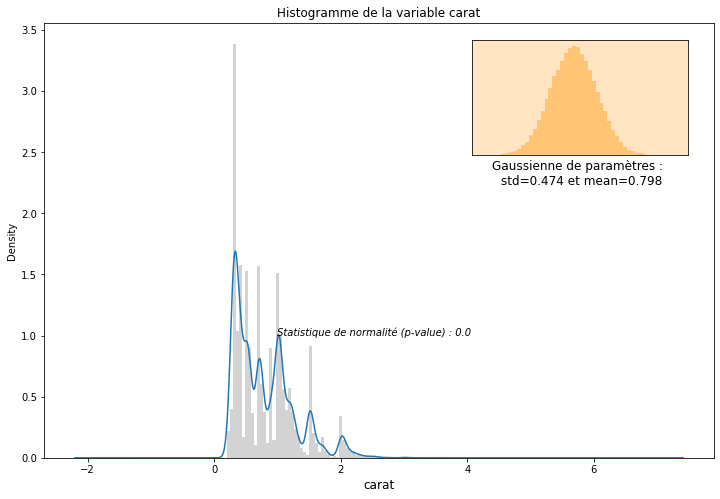

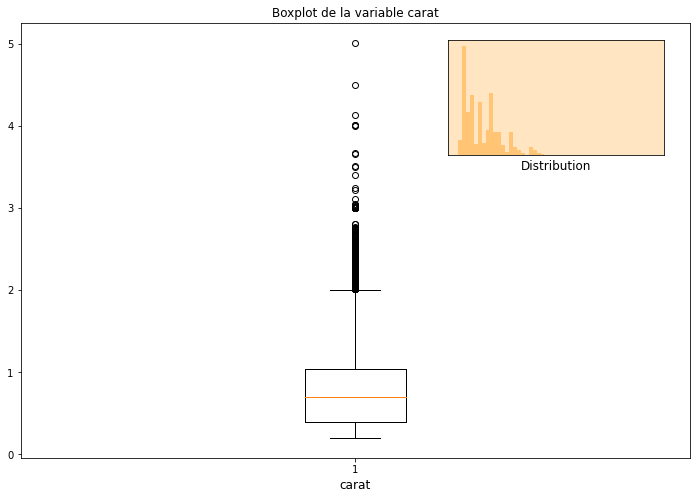

In [122]:
descQuanti("carat")

## Deuxième partie

In [ ]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [119]:
def descQuali(variable):
    plt.figure(figsize=(12,8))
    eff_table = pd.DataFrame(diamonds.groupby(variable).count()[diamonds.columns[0]])
    eff_table.columns = ["count"]

    effe_table_pivot = eff_table.T
    percentage = [modality/sum(eff_table["count"].tolist()) for modality in eff_table["count"].tolist()]

    effe_table_pivot.loc[len(effe_table_pivot)] = percentage
    display(effe_table_pivot)

    plt.bar(eff_table["count"].index.tolist(), eff_table["count"].tolist(), color="#FFC575")
    plt.title("Diagramme en bar de la variable %s" % variable)

    plt.xlabel("Modalité de la variable %s" % variable)

cut,Fair,Good,Ideal,Premium,Very Good
count,1610.000000,4906.000000,21551.000000,13791.000000,12082.00000
1,0.029848,0.090953,0.399537,0.255673,0.22399


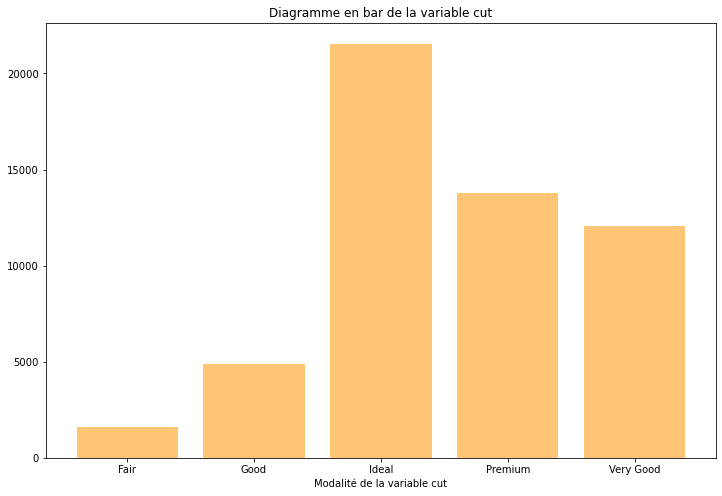

In [120]:
descQuali("cut")